In [211]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency, ttest_ind, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from tqdm import tqdm
from scipy.stats import spearmanr, mannwhitneyu

In [212]:
df = pd.read_csv("Dataset/dataset_8000.csv")
df.columns

Index(['package_name', 'description', 'package_created', 'last_modified',
       'package_age', 'latest_version', 'months_since_latest_version_synk',
       'version_release_frequency_months', 'version_release_frequency_years',
       'num_versions_released', 'maintainers_length', 'dependencies_name',
       'dependencies_count', 'dev_dependencies_name', 'dev_dependencies_count',
       'readme_exists_npmjs', 'last_day_downloads', 'last_week_downloads',
       'last_month_downloads', 'last_3_month_downloads', 'License',
       'Health Score', 'vul_count', 'Security Recommendation', 'Popularity',
       'Maintainence', 'Community', 'git_repository', 'stars', 'forks',
       'git_unique_contributors', 'github_contributors', 'open_PRs',
       'merged_PRs', 'open_issues', 'resolved_issues', 'total_commits',
       'last_commit_before_months', 'months_since_last_commit',
       'avg_commits_per_day', 'total_lines_added', 'total_lines_deleted',
       'lines_added_one_and_half_year', 'lines

In [213]:
nan_count = df['package_name'].isna().sum()
nan_count

691

In [214]:
df.dropna(subset=['package_name'], inplace=True)

In [215]:
nan_count = df['package_name'].isna().sum()
nan_count

0

In [216]:
len(df)

8299

# RQ1

In [217]:
number_of_trivial = df[df['Trivial'] == True].shape[0]
total = df['Trivial'].count()
print(f"Trivial percentage: {(number_of_trivial/total)*100} %")

Trivial percentage: 15.917580431377273 %


In [218]:
number_of_dead = df[df['Dead'] == True].shape[0]
total = df['Dead'].count()
print(f"Dead percentage: {(number_of_dead/total)*100} %")

Dead percentage: 73.1562302340291 %


In [219]:
number_of_inactive = df[df['Inactive'] == True].shape[0]
total = df['Inactive'].count()
print(f"Inactive percentage: {(number_of_inactive/total)*100} %")

Inactive percentage: 7.205687432220749 %


In [220]:
number_of_deprecated = df[df['Deprecated'] == True].shape[0]
total = df['Deprecated'].count()
print(f"'Deprecated' percentage: {(number_of_deprecated/total)*100} %")

'Deprecated' percentage: 3.0847090010844678 %


In [221]:
categories = ['Trivial', 'Dead', 'Inactive', 'Deprecated']
def percentage_count(df):
    dict = {}
    for cat in categories:
        num = df[df[cat] == True].shape[0]
        total = df[cat].count()
        dict[cat] = (num/total)*100
    return dict

In [222]:
# Perform bootstrapping and sample data 10 times
np.random.seed(42)
bootstrapped_samples = [df.sample(n=len(df), replace =True) for _ in range(10)]

In [223]:
package_percentage = []
for sample in bootstrapped_samples:
    package_percentage.append(percentage_count(sample))

In [224]:
percentage_df = pd.DataFrame(package_percentage)
percentage_df

,Trivial,Dead,Inactive,Deprecated
0,16.001928,72.226444,7.073141,3.518496
1,16.098325,74.140980,7.446680,3.205205
2,15.760935,73.292004,7.157489,2.916014
3,16.267020,73.424277,6.928546,2.843716
4,16.170623,72.949256,7.675624,3.048560
5,16.291119,72.925599,7.338234,2.940113
6,15.303049,73.646940,7.169538,3.120858
7,15.881431,73.463687,7.049042,3.205205
8,15.712736,72.529419,7.012893,2.831666
9,16.194722,72.525943,7.290035,2.976262


In [225]:
mean_values = percentage_df.mean()

# Convert the mean values to a DataFrame with one row
mean_row = pd.DataFrame([mean_values], columns=percentage_df.columns)

# Append mean row to the end of the DataFrame
percentage_df = pd.concat([percentage_df, mean_row], ignore_index=True)
percentage_df

,Trivial,Dead,Inactive,Deprecated
0,16.001928,72.226444,7.073141,3.518496
1,16.098325,74.140980,7.446680,3.205205
2,15.760935,73.292004,7.157489,2.916014
3,16.267020,73.424277,6.928546,2.843716
4,16.170623,72.949256,7.675624,3.048560
5,16.291119,72.925599,7.338234,2.940113
6,15.303049,73.646940,7.169538,3.120858
7,15.881431,73.463687,7.049042,3.205205
8,15.712736,72.529419,7.012893,2.831666
9,16.194722,72.525943,7.290035,2.976262


# RQ2

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8299 entries, 0 to 8989
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   package_name                      8299 non-null   object 
 1   description                       8146 non-null   object 
 2   package_created                   8299 non-null   object 
 3   last_modified                     8299 non-null   object 
 4   package_age                       8299 non-null   float64
 5   latest_version                    8299 non-null   object 
 6   months_since_latest_version_synk  8299 non-null   float64
 7   version_release_frequency_months  8299 non-null   float64
 8   version_release_frequency_years   8299 non-null   float64
 9   num_versions_released             8299 non-null   float64
 10  maintainers_length                8299 non-null   float64
 11  dependencies_name                 8299 non-null   object 
 12  dependencie

In [154]:
# to remove: package_name, latest_version, dependencies_name, dev_dependencies_name , git_repository, 'last_modified', package_created

In [227]:
analysis_df = df.copy()

### !!!!!!! Discuss about last_modified, package created !!!!!!

In [228]:
columns_to_remove = ['package_name', 'latest_version', 'dependencies_name', 'dev_dependencies_name', 'git_repository', 'last_modified', 'package_created']
analysis_df.drop(columns=columns_to_remove, inplace = True)

In [229]:
# Convert 'readme_exists_npmjs' column to boolean type
analysis_df['readme_exists_npmjs'] = analysis_df['readme_exists_npmjs'].astype(bool)
analysis_df['TS Typings'] = analysis_df['TS Typings'].astype(bool)

# Convert 'Health Score' column to numeric, replacing non-numeric values with NaN
analysis_df['Health Score'] = pd.to_numeric(analysis_df['Health Score'], errors='coerce')

# Replace non-finite values (NaN) with a default value (e.g., 0)
analysis_df['Health Score'].fillna(0, inplace=True)

# Convert 'Health Score' column to integer data type
analysis_df['Health Score'] = analysis_df['Health Score'].astype('int64')

# Insert True or False
analysis_df['License'] = analysis_df['License'].notna()
analysis_df['description'] = analysis_df['description'].notna()

/var/folders/fg/x7l536l522l38ymr8y77r7j00000gn/T/ipykernel_5729/1158917067.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  analysis_df['Health Score'].fillna(0, inplace=True)


In [230]:
# Convert values to bytes and integers
def convert_to_bytes(value):
    if 'kB' in value:
        return int(float(value.split()[0]) * 1024)  # Convert kB to bytes
    elif 'MB' in value:
        return int(float(value.split()[0]) * 1024 * 1024)  # Convert MB to bytes
    else:
        return int(value.split()[0]) 

In [231]:
analysis_df['Install Size'] = analysis_df['Install Size'].apply(convert_to_bytes)

In [232]:
post_df = analysis_df.copy()

In [233]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8299 entries, 0 to 8989
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   description                       8299 non-null   bool   
 1   package_age                       8299 non-null   float64
 2   months_since_latest_version_synk  8299 non-null   float64
 3   version_release_frequency_months  8299 non-null   float64
 4   version_release_frequency_years   8299 non-null   float64
 5   num_versions_released             8299 non-null   float64
 6   maintainers_length                8299 non-null   float64
 7   dependencies_count                8299 non-null   float64
 8   dev_dependencies_count            8299 non-null   float64
 9   readme_exists_npmjs               8299 non-null   bool   
 10  last_day_downloads                8299 non-null   float64
 11  last_week_downloads               8299 non-null   float64
 12  last_month_

In [234]:
# Assuming 'df' is your DataFrame
categorical_variables = []

for column in analysis_df.iloc[:, :-4].columns:
    if analysis_df[column].dtype == 'object' or analysis_df[column].dtype == 'bool':
        categorical_variables.append(column)

In [235]:
categorical_variables

['description',
 'readme_exists_npmjs',
 'License',
 'Security Recommendation',
 'Popularity',
 'Maintainence',
 'Community',
 'readme_updated',
 'TS Typings']

In [236]:
def chi_test(analysis_df, y):
    significant_predictors = []
    for column in categorical_variables:
        crosstab = pd.crosstab(analysis_df[column], y)
        chi2, p_val, _, _ = chi2_contingency(crosstab)
        if p_val < 0.05:
            dict = {}
            dict['predictor'] = column
            dict['test_stat'] = chi2
            dict['p_val'] = p_val
            dict['from'] = "chi2"
            corr_coef = np.sqrt(chi2 / len(analysis_df))
            dict['corr'] = corr_coef
            significant_predictors.append(dict)
    return significant_predictors

In [237]:
# Function to calculate VIF for each predictor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Predictor"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [238]:
cols_to_remove = analysis_df.select_dtypes(include=['float', 'int'])
cols_to_remove.fillna(cols_to_remove.mean(), inplace=True)
dropped_indices = cols_to_remove.index[cols_to_remove.isna().any(axis=1)].tolist()
cols_to_remove.dropna(inplace=True)


vif_scores = calculate_vif(cols_to_remove)


# Remove predictors with high VIF (indicating multicollinearity)
high_vif_predictors = vif_scores[vif_scores['VIF'] > 5]['Predictor'].tolist()
analysis_df = analysis_df.drop(high_vif_predictors, axis=1)

In [239]:
def numeric(analysis_df, y):
    numeric_df = analysis_df.select_dtypes(include=['float', 'int'])
    numeric_df.fillna(numeric_df.mean(), inplace=True)
    dropped_indices = numeric_df.index[numeric_df.isna().any(axis=1)].tolist()
    numeric_df.dropna(inplace=True)

    # # Calculate VIF for predictors to identify multicollinearity
    # vif_scores = calculate_vif(numeric_df)
    # # Remove predictors with high VIF (indicating multicollinearity)
    # high_vif_predictors = vif_scores[vif_scores['VIF'] > 10]['Predictor'].tolist()
    # numeric_df = numeric_df.drop(high_vif_predictors, axis=1)

    if len(dropped_indices) > 0:
        y = y[y.index != dropped_indices]
    return numeric_df, y

In [240]:
# def ttest(numeric_df, y):
#     significant_predictors = []
#     dropped_indices = y.index[y.isna()]
#     if len(dropped_indices) > 0:
#         y = y[~y.index.isin(dropped_indices)]  # Filter y using dropped_indices
#         numeric_df = numeric_df[~numeric_df.index.isin(dropped_indices)]  # Filter numeric_df using dropped_indices
#     for column in numeric_df.columns:
#         t_stat, p_val = ttest_ind(numeric_df[y == True][column], numeric_df[y == False][column], equal_var = False)
#         if p_val < 0.1:
#             result_dict = {}
#             spearman_corr, _ = spearmanr(numeric_df[column], y)
#             result_dict['predictor'] = column
#             result_dict['test_stat'] = t_stat
#             result_dict['p_val'] = p_val
#             result_dict['from'] = "ttest"
#             result_dict['corr'] = spearman_corr
#             significant_predictors.append(result_dict)
#     return significant_predictors

In [241]:
def mannwhitneyu_test(numeric_df, y):
    significant_predictors = []
    dropped_indices = y.index[y.isna()]
    if len(dropped_indices) > 0:
        y = y[~y.index.isin(dropped_indices)]  # Filter y using dropped_indices
        numeric_df = numeric_df[~numeric_df.index.isin(dropped_indices)]  # Filter numeric_df using dropped_indices
    for column in numeric_df.columns:
        u_stat, p_val = mannwhitneyu(numeric_df[y == True][column], numeric_df[y == False][column], alternative='two-sided')
        if p_val < 0.1:
            result_dict = {}
            spearman_corr, _ = spearmanr(numeric_df[column], y)
            result_dict['predictor'] = column
            result_dict['test_stat'] = u_stat
            result_dict['p_val'] = p_val
            result_dict['from'] = "Mann-Whitney U test"
            result_dict['corr'] = spearman_corr
            significant_predictors.append(result_dict)
    return significant_predictors


In [243]:
def corr_value(data_list, pred):
    for item in data_list:
        if item['predictor'] == pred:
            corr_value = item['corr']
            return corr_value

In [245]:
def pred_corr(bootstrapped_samples, category):
    key_to_extract = 'predictor'
    sustained_predictors = []
    corr_cal = {}
    
    
    for i, sample in enumerate(bootstrapped_samples):
        numeric_df, y = numeric(sample, sample[category])
        significant_predictors_num = mannwhitneyu_test(numeric_df, y)
        
        significant_predictors_cat = chi_test(sample, y)
    
        significant_predictors = significant_predictors_num + significant_predictors_cat
        # print(significant_predictors)
        extracted_values = [d[key_to_extract] for d in significant_predictors]
        if len(sustained_predictors) > 0:
            common_values = list(set(extracted_values).intersection(set(sustained_predictors)))
            sustained_predictors = common_values          
                    
        else:
            sustained_predictors.extend(extracted_values)

        selected_dicts = [d for d in significant_predictors if d.get('predictor') in sustained_predictors]

        for pred in selected_dicts:
            if pred['predictor'] in corr_cal:
                corr_cal[pred['predictor']] = corr_cal[pred['predictor']] + corr_value(selected_dicts, pred['predictor'])
            else:
                corr_cal[pred['predictor']] = corr_value(selected_dicts, pred['predictor'])

    return sustained_predictors, corr_cal

In [246]:
def package_pred(corr_cal, sustained_predictors):
    final_predictors = []
    for key in corr_cal:
        if key in sustained_predictors:
            corr_dict = {}
            corr_dict[key] = corr_cal[key]/10
            final_predictors.append(corr_dict)
    return final_predictors

In [247]:
# Perform bootstrapping and sample data 10 times
np.random.seed(42)
bootstrapped_samples = [analysis_df.sample(n=len(analysis_df), replace=True) for _ in range(10)]
category_pred = {}

categories = ['Trivial', 'Dead', 'Inactive', 'Deprecated']

for package_cat in tqdm(categories):
    sustained_predictors, corr_cal = pred_corr(bootstrapped_samples, package_cat)
    final_predictors = package_pred(corr_cal, sustained_predictors)
    category_pred[package_cat] = final_predictors


100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.22s/it]


In [248]:
def categorize_strength(corr):
    corr_abs = abs(corr)
    if corr_abs >= 0.5:
        return 'Strong'
    elif corr_abs >= 0.3:
        return 'Moderate'
    else:
        return 'Weak'

### Trivial

In [249]:
# Initialize an empty list to store dictionaries
result_dicts = []

# Iterate through the list of dictionaries
for d in category_pred['Trivial']:
    # Extract key and value from each dictionary
    for key, value in d.items():
        # Create a new dictionary with 'predictor' and 'corr' keys
        result_dict = {'predictor': key, 'corr': value}
        # Append the new dictionary to the result_dicts list
        result_dicts.append(result_dict)

# Create DataFrame from the list of dictionaries
trivial_df = pd.DataFrame(result_dicts)
trivial_df['strength'] = trivial_df['corr'].apply(categorize_strength)
trivial_df

,predictor,corr,strength
0,num_versions_released,-0.204978,Weak
1,dependencies_count,-0.213326,Weak
2,dev_dependencies_count,-0.234522,Weak
3,github_contributors,-0.060153,Weak
4,open_PRs,-0.145927,Weak
5,open_issues,-0.142701,Weak
6,resolved_issues,-0.162565,Weak
7,total_commits,-0.318665,Moderate
8,avg_commits_per_day,0.103352,Weak
9,lines_deleted_one_and_half_year,-0.112163,Weak


In [250]:
filtered_pred_df = trivial_df[(trivial_df['strength'] == 'Strong') | (trivial_df['strength'] == 'Moderate')]
filtered_pred_df

,predictor,corr,strength
7,total_commits,-0.318665,Moderate
10,LOC,-0.502816,Strong
11,sloc_javascript,-0.542761,Strong
12,cyclomatic_complexity,-0.587296,Strong


### Dead

In [251]:
# Initialize an empty list to store dictionaries
result_dicts = []

# Iterate through the list of dictionaries
for d in category_pred['Dead']:
    # Extract key and value from each dictionary
    for key, value in d.items():
        # Create a new dictionary with 'predictor' and 'corr' keys
        result_dict = {'predictor': key, 'corr': value}
        # Append the new dictionary to the result_dicts list
        result_dicts.append(result_dict)

# Create DataFrame from the list of dictionaries
dead_df = pd.DataFrame(result_dicts)
dead_df['strength'] = dead_df['corr'].apply(categorize_strength)
dead_df

,predictor,corr,strength
0,num_versions_released,-0.229958,Weak
1,maintainers_length,-0.079015,Weak
2,dependencies_count,-0.041842,Weak
3,dev_dependencies_count,-0.146099,Weak
4,github_contributors,-0.088144,Weak
5,open_PRs,-0.137522,Weak
6,open_issues,-0.181409,Weak
7,resolved_issues,-0.257600,Weak
8,total_commits,-0.291668,Weak
9,avg_commits_per_day,0.111538,Weak


In [252]:
filtered_pred_df = dead_df[(trivial_df['strength'] == 'Strong') | (dead_df['strength'] == 'Moderate')]
filtered_pred_df

,predictor,corr,strength
10,lines_deleted_one_and_half_year,-0.770159,Strong
11,LOC,-0.067218,Weak
12,cyclomatic_complexity,-0.039321,Weak
13,Install Size,-0.415674,Moderate
14,# of Files,-0.421783,Moderate
18,Maintainence,0.358125,Moderate


### Inactive

In [253]:
# Initialize an empty list to store dictionaries
result_dicts = []

# Iterate through the list of dictionaries
for d in category_pred['Inactive']:
    # Extract key and value from each dictionary
    for key, value in d.items():
        # Create a new dictionary with 'predictor' and 'corr' keys
        result_dict = {'predictor': key, 'corr': value}
        # Append the new dictionary to the result_dicts list
        result_dicts.append(result_dict)

# Create DataFrame from the list of dictionaries
inactive_df = pd.DataFrame(result_dicts)
inactive_df['strength'] = inactive_df['corr'].apply(categorize_strength)
inactive_df

,predictor,corr,strength
0,maintainers_length,0.057291,Weak
1,dependencies_count,-0.028058,Weak
2,open_issues,0.071480,Weak
3,resolved_issues,0.072406,Weak
4,avg_commits_per_day,-0.069214,Weak
5,Install Size,-0.033430,Weak
6,# of Files,-0.036716,Weak
7,Security Recommendation,0.043784,Weak
8,Popularity,0.083445,Weak


In [254]:
# filtered_pred_df = trivial_df[(trivial_df['strength'] == 'Strong') | (trivial_df['strength'] == 'Moderate')]
# filtered_pred_df

### Deprecated

In [255]:
# Initialize an empty list to store dictionaries
result_dicts = []

# Iterate through the list of dictionaries
for d in category_pred['Deprecated']:
    # Extract key and value from each dictionary
    for key, value in d.items():
        # Create a new dictionary with 'predictor' and 'corr' keys
        result_dict = {'predictor': key, 'corr': value}
        # Append the new dictionary to the result_dicts list
        result_dicts.append(result_dict)

# Create DataFrame from the list of dictionaries
deprecated_df = pd.DataFrame(result_dicts)
deprecated_df['strength'] = deprecated_df['corr'].apply(categorize_strength)
deprecated_df

,predictor,corr,strength
0,num_versions_released,0.064790,Weak
1,maintainers_length,0.067433,Weak
2,resolved_issues,0.087409,Weak
3,total_commits,0.084832,Weak
4,avg_commits_per_day,-0.043796,Weak
5,LOC,0.038049,Weak
6,sloc_javascript,0.035674,Weak
7,Maintainence,0.039944,Weak


In [256]:
# filtered_pred_df = trivial_df[(trivial_df['strength'] == 'Strong') | (trivial_df['strength'] == 'Moderate')]

# filtered_pred_df

# RQ3

### 3A

In [183]:
package_categories = ['Trivial', 'Dead', 'Deprecated', 'Inactive']

# Create pairs of elements ensuring the reverse pair is also present
pairs = [(package_categories[i], package_categories[j]) for i in range(len(package_categories)) for j in range(i+1, len(package_categories))] + \
        [(package_categories[j], package_categories[i]) for i in range(len(package_categories)) for j in range(i+1, len(package_categories))]

# Display pairs
print(pairs)

[('Trivial', 'Dead'), ('Trivial', 'Deprecated'), ('Trivial', 'Inactive'), ('Dead', 'Deprecated'), ('Dead', 'Inactive'), ('Deprecated', 'Inactive'), ('Dead', 'Trivial'), ('Deprecated', 'Trivial'), ('Inactive', 'Trivial'), ('Deprecated', 'Dead'), ('Inactive', 'Dead'), ('Inactive', 'Deprecated')]


In [184]:
pair_corr = {}
for pair in pairs:
    pair_0 = df[df[pair[0]] == True]
    left_count = pair_0[pair_0[pair[1]] == True]
    left_percent = len(left_count)/len(pair_0)

    pair_corr[pair] = left_percent*100

pair_corr

{('Trivial', 'Dead'): 76.83573050719153,
 ('Trivial', 'Deprecated'): 2.043906131718395,
 ('Trivial', 'Inactive'): 6.207418622255867,
 ('Dead', 'Deprecated'): 3.077987203873422,
 ('Dead', 'Inactive'): 7.0897458066747365,
 ('Deprecated', 'Inactive'): 7.421875,
 ('Dead', 'Trivial'): 17.55144388725575,
 ('Deprecated', 'Trivial'): 10.546875,
 ('Inactive', 'Trivial'): 13.712374581939798,
 ('Deprecated', 'Dead'): 69.53125,
 ('Inactive', 'Dead'): 68.56187290969899,
 ('Inactive', 'Deprecated'): 3.177257525083612}

#### Should I do bootstrapping here as well?

In [187]:
pair_predictors = {}

for pair in pair_corr:
    pair_0_df = analysis_df[analysis_df[pair[0]] == True]
    y = pair_0_df[pair[1]]
    pair_0_df = pair_0_df.iloc[:, :-4]
    pair_0_df[pair[1]] = y
    bootstrapped_samples = [pair_0_df.sample(n=len(pair_0_df), replace=True) for _ in range(10)]
    sustained_predictors, corr_cal = pred_corr(bootstrapped_samples, pair[1])
    final_predictors = package_pred(corr_cal, sustained_predictors)
    pair_predictors[pair] = final_predictors

In [209]:
for pair_pred in pair_predictors:
    print("======================================")
    print(f"{pair_pred} ---> {pair_corr[pair_pred]}")
    print("-----------------------------------------")
    for dictionary in pair_predictors[pair_pred]:
        for key, value in dictionary.items():
            print(f"{key} : {value}")

('Trivial', 'Dead') ---> 76.83573050719153
-----------------------------------------
num_versions_released : -0.1845005112104719
total_commits : -0.12009223463671934
avg_commits_per_day : 0.12769002229215334
lines_deleted_one_and_half_year : -0.6579870823895885
cyclomatic_complexity : 0.08758234252163724
Install Size : -0.40495503072262523
# of Files : -0.40913110836517336
readme_exists_npmjs : 0.08282692113592169
Security Recommendation : 0.1425447083251189
Maintainence : 0.24570658095202053
readme_updated : 0.5619617870735445
('Trivial', 'Deprecated') ---> 2.043906131718395
-----------------------------------------
avg_commits_per_day : -0.047490344124955286
resolved_issues : 0.009384695278388476
Community : 0.005683349392871747
('Trivial', 'Inactive') ---> 6.207418622255867
-----------------------------------------
dev_dependencies_count : 0.018712270895973902
open_issues : 0.06609046674540241
total_commits : 0.01188290009747353
lines_deleted_one_and_half_year : 0.01056534589657766


### 3B

In [190]:
categories = ['Trivial', 'Dead', 'Inactive', 'Deprecated']
health_corr = {}

post_df['health_status'] = post_df['Health Score'].apply(lambda x: 'Unhealthy' if x < 42 else 'Healthy')


for cat in categories:
    l = {}
    count = len(post_df[(post_df[cat] == True) & (post_df['health_status'] == 'Unhealthy')])
    total = len(post_df[post_df[cat] == True])
    health_corr[cat] = count/total*100
health_corr

{'Trivial': 31.642694928084786,
 'Dead': 37.09147501296905,
 'Inactive': 25.91973244147157,
 'Deprecated': 34.765625}

In [191]:
for cat in categories:
    print(f"============================================")
    print(cat)
    print(f"Max (Yes): {post_df[post_df[cat] == True]['Health Score'].max()}")
    print(f"Max (No): {post_df[post_df[cat] == False]['Health Score'].max()}")
    print(f"Min (Yes): {post_df[post_df[cat] == True]['Health Score'].min()}")
    print(f"Min (No): {post_df[post_df[cat] == False]['Health Score'].min()}")

Trivial
Max (Yes): 74
Max (No): 94
Min (Yes): 10
Min (No): 0
Dead
Max (Yes): 71
Max (No): 94
Min (Yes): 18
Min (No): 18
Inactive
Max (Yes): 89
Max (No): 94
Min (Yes): 10
Min (No): 0
Deprecated
Max (Yes): 59
Max (No): 94
Min (Yes): 10
Min (No): 0


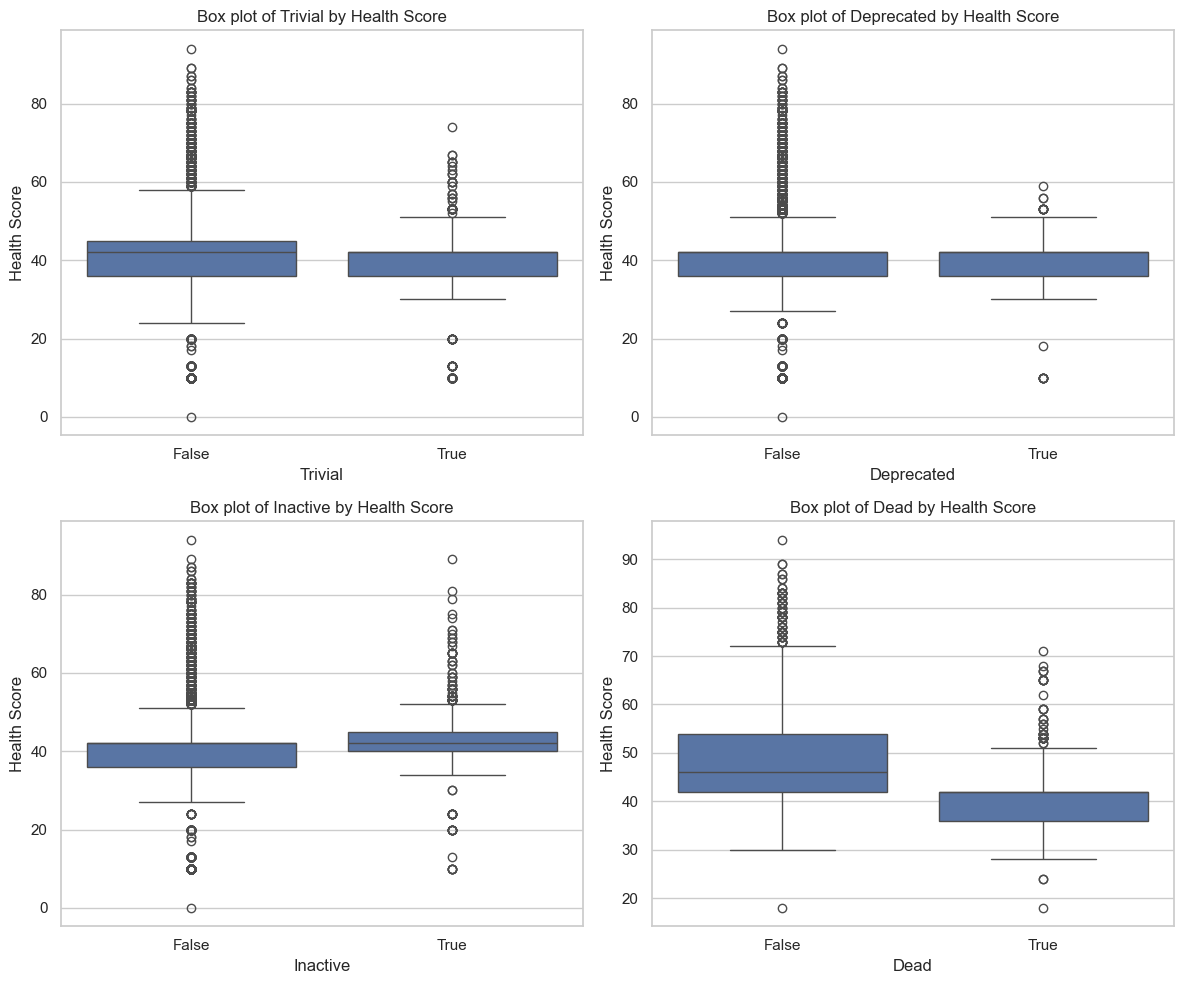

In [192]:
# Assuming post_df contains data for 'Trivial', 'Deprecated', 'Inactive', 'Dead'

# Create a f`igure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over each category and create a box plot
categories = ['Trivial', 'Deprecated', 'Inactive', 'Dead']
for i, category in enumerate(categories):
    # Filter out NaN values
    category_data = post_df.dropna(subset=[category])
    sns.boxplot(x=category, y='Health Score', data=category_data, ax=axes[i])
    axes[i].set_title(f'Box plot of {category} by Health Score')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Health Score')

# Adjust layout
plt.tight_layout()

plt.show()


In [206]:
health_predictors = {}


for cat in categories:
    unhealthy_df = post_df[post_df['health_status'] == 'Unhealthy']
    y = unhealthy_df[cat]
    unhealthy_df = unhealthy_df.iloc[:, :-5]
    unhealthy_df[cat] = y
    bootstrapped_samples = [unhealthy_df.sample(n=len(unhealthy_df), replace=True) for _ in range(10)]
    sustained_predictors, corr_cal = pred_corr(bootstrapped_samples, cat)
    final_predictors = package_pred(corr_cal, sustained_predictors)
    health_predictors[cat] = final_predictors
    filtered_correlation_data = [{key: value} for item in final_predictors for key, value in item.items() if abs(value) > 0.2]
    if len(filtered_correlation_data) > 0:
        health_predictors[cat] = filtered_correlation_data 
    else:
        health_predictors[cat] = [{key: value} for item in final_predictors for key, value in item.items() if abs(value) > 0.1]

In [208]:
for health_pred in health_predictors:
    print("======================================")
    print(f"{health_pred} ---> {health_corr[health_pred]}")
    print("-----------------------------------------")
    for dictionary in health_predictors[health_pred]:
        for key, value in dictionary.items():
            print(f"{key} : {value}")

Trivial ---> 31.642694928084786
-----------------------------------------
dependencies_count : -0.25399703888180225
dev_dependencies_count : -0.20603097917710453
total_commits : -0.29851257062638903
total_lines_added : -0.33983731960785035
total_lines_deleted : -0.32593553749148846
LOC : -0.48360190522073204
sloc_javascript : -0.5480628565103022
cyclomatic_complexity : -0.5790040022796377
Security Recommendation : 0.20480992448127186
Deprecated ---> 34.765625
-----------------------------------------
version_release_frequency_months : 0.10951507751044001
version_release_frequency_years : 0.10948387329127782
resolved_issues : 0.10277001471279752
total_commits : 0.11020168400820012
total_lines_deleted : 0.1003946208845969
Inactive ---> 25.91973244147157
-----------------------------------------
last_day_downloads : 0.11557467907370426
last_week_downloads : 0.10866160675871935
last_month_downloads : 0.10688343015233015
forks : 0.10730052048530028
Maintainence : 0.15723116583389635
Dead --

/var/folders/fg/x7l536l522l38ymr8y77r7j00000gn/T/ipykernel_5729/3270610230.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=category, y='Health Score', data=post_df.groupby(category)['Health Score'].median().reset_index(), color='black', markers='o', scale=0.7, ax=axes[row, col])
/var/folders/fg/x7l536l522l38ymr8y77r7j00000gn/T/ipykernel_5729/3270610230.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=category, y='Health Score', data=post_df.groupby(category)['Health Score'].median().reset_index(), color='black', markers='o', scale=0.7, ax=axes[row, col])
/var/folders/fg/x7l536l522l38ymr8y77r7j00000gn/T/ipykernel_572

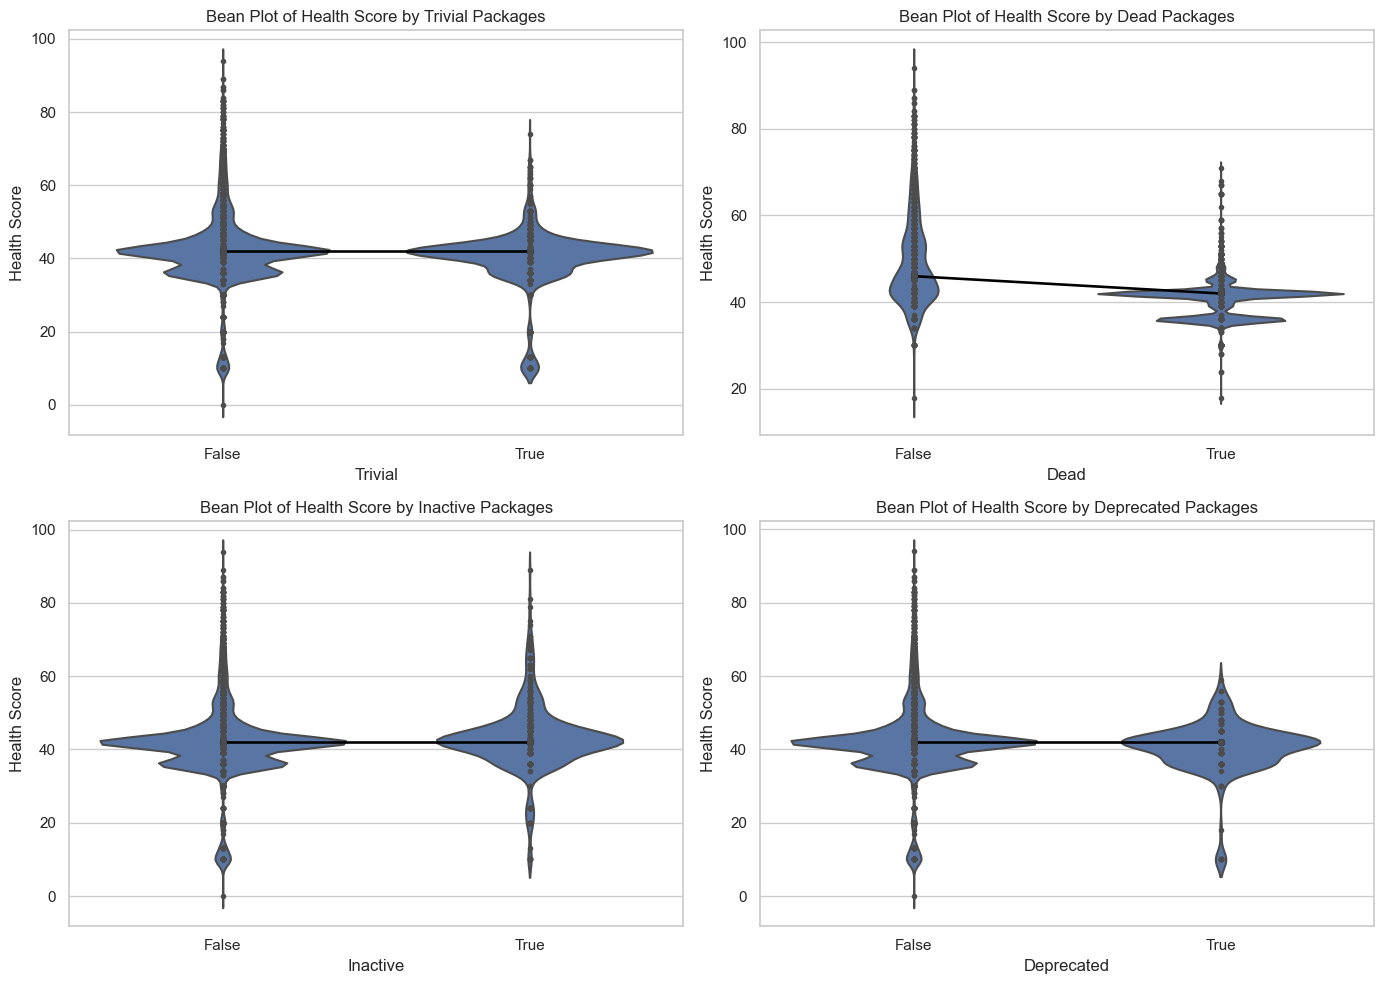

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define categories
categories = ['Trivial', 'Dead', 'Inactive', 'Deprecated']

# Loop through each category and create bean plots
for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    
    sns.violinplot(x=category, y='Health Score', data=post_df, inner='point', linewidth=1.5, ax=axes[row, col])
    
    # Adding median values as points
    sns.pointplot(x=category, y='Health Score', data=post_df.groupby(category)['Health Score'].median().reset_index(), color='black', markers='o', scale=0.7, ax=axes[row, col])

    axes[row, col].set_title(f'Bean Plot of Health Score by {category} Packages')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('Health Score')

plt.tight_layout()
plt.show()
